In [269]:
from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Data Cleaning 

In [220]:
data  = pd.read_csv('/Users/william/Documents/RHoMIS_Data/Data/RHoMIS_Indicators.csv',encoding='latin1')

In [84]:
data.head()

,ID_PROJ,ID_COUNTRY,YEAR,ITERATION,SURVEY_ID,ID_HH,RHoMIS_ID,GPS_LAT,GPS_LON,GPS_ALT,...,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput
0,ADN,BF,2019,1,BF_ADN_2019,BF_2019_ADN_1_1,BF_2019_ADN_1_1,11.19,-0.95,254.0,...,0.0,0.717683,0.116832,4621.267353,754.360895,0,702.949550,0.696542,0.303458,NaN
1,ADN,BF,2019,1,BF_ADN_2019,BF_2019_ADN_2_1,BF_2019_ADN_2_1,11.19,-0.95,346.0,...,0.0,0.061435,0.061435,2503.023263,2303.522017,0,94415.087935,0.539852,0.460148,100.0
2,ADN,BF,2019,1,BF_ADN_2019,BF_2019_ADN_3_1,BF_2019_ADN_3_1,11.19,-0.99,324.0,...,0.0,0.000000,0.000000,381.108158,381.108158,9,113.654565,0.695815,0.304185,50.0
3,ADN,BF,2019,1,BF_ADN_2019,BF_2019_ADN_4_1,BF_2019_ADN_4_1,11.19,-0.99,326.0,...,0.0,0.899135,0.034582,9948.141738,620.787518,4,43062.200002,0.243574,0.756426,150.0
4,ADN,BF,2019,1,BF_ADN_2019,BF_2019_ADN_5_1,BF_2019_ADN_5_1,11.22,-1.02,308.0,...,0.0,0.169250,0.051715,2209.261281,1767.543491,0,13331.792068,0.606037,0.393963,250.0


In [10]:
data.count()

ID_PROJ                                         35728
ID_COUNTRY                                      35728
YEAR                                            35728
ITERATION                                       35728
SURVEY_ID                                       35728
ID_HH                                           35728
RHoMIS_ID                                       35728
GPS_LAT                                         34690
GPS_LON                                         34690
GPS_ALT                                         27762
Country                                         35728
Region                                          19462
Altitude                                        27762
HHsizemembers                                   35728
HHsizeMAE                                       34765
HouseholdType                                   34361
Head_EducationLevel                             32738
LandOwned                                       26236
LandCultivated              

In [13]:
data.shape

(35728, 54)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35728 entries, 0 to 35727
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID_PROJ                                       35728 non-null  object 
 1   ID_COUNTRY                                    35728 non-null  object 
 2   YEAR                                          35728 non-null  int64  
 3   ITERATION                                     35728 non-null  int64  
 4   SURVEY_ID                                     35728 non-null  object 
 5   ID_HH                                         35728 non-null  object 
 6   RHoMIS_ID                                     35728 non-null  object 
 7   GPS_LAT                                       34690 non-null  float64
 8   GPS_LON                                       34690 non-null  float64
 9   GPS_ALT                                       27762 non-null 

In [11]:
for column in data:
    print(data[column].describe())


count     35728
unique       69
top         OAF
freq       2713
Name: ID_PROJ, dtype: object
count     35728
unique       33
top          ET
freq       3701
Name: ID_COUNTRY, dtype: object
count    35728.000000
mean      2018.181538
std          1.276994
min       2015.000000
25%       2018.000000
50%       2018.000000
75%       2019.000000
max       2020.000000
Name: YEAR, dtype: float64
count    35728.000000
mean         1.028857
std          0.167407
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: ITERATION, dtype: float64
count           35728
unique             98
top       RW_OAF_2018
freq             2713
Name: SURVEY_ID, dtype: object
count               35728
unique              35698
top       TZ_2016_SRL_1_2
freq                    5
Name: ID_HH, dtype: object
count                 35728
unique                35728
top       BI_2019_SNV_123_1
freq                      1
Name: RHoMIS_ID, dtype: object
count  

In [41]:
negative_col = ['LandCultivated', 'LandOwned', 'currency_conversion_factor','total_income_USD_PPP_pHH_Yr','offfarm_income_USD_PPP_pHH_Yr','value_livestock_prod_consumed_USD_PPP_pHH_Yr','NrofMonthsWildFoodCons']

In [51]:
categorical_col = ['Country','HouseholdType','Head_EducationLevel', 'WorstFoodSecMonth' ,'BestFoodSecMonth','HFIAS_status']
# Head_EducationLevel specification about  possible values was not given so we omit this for now 

In [191]:
# replace negative values for features that are bounded to be positive only  as distance metrics like Land cultivated measured in hectares or Income and PPP earned 

def replace_negative(data,columns):
    for col in columns:
        data.loc[data[col] < 0] = 0
    

In [221]:
    
replace_negative(data,negative_col)

In [222]:
# make a copy  and drop indicators that will not benefit a model for food security 
data_model = data.copy()
data_model = data.drop(['ID_PROJ','ID_COUNTRY','SURVEY_ID','Region'],axis=1)

In [46]:
# Convert categorical Data to numerical Using dummy variables 
def categorical_conv(data,columns):
    

In [87]:
for col in data:
    if data[col].dtype == object:
        print(col)

ID_PROJ
ID_COUNTRY
SURVEY_ID
ID_HH
RHoMIS_ID
Country
Region
HouseholdType
Head_EducationLevel
WorstFoodSecMonth
BestFoodSecMonth
HFIAS_status


In [223]:
# replace  HFIAS status with 0 with missing value 
data_model.loc[data_model['HFIAS_status'] == 0] = np.NaN


In [226]:
#replace WorstFoodSecMonth and BestFoodSecMonth with No_answer or none with  missing value 
data_model.loc[data_model['WorstFoodSecMonth'] == 'No_answer'] = np.NaN
data_model.loc[data_model['WorstFoodSecMonth'] == 'None'] = np.NaN
data_model.loc[data_model['WorstFoodSecMonth'] == 'no_answer'] = np.NaN
data_model.loc[data_model['BestFoodSecMonth'] == 'No_answer'] = np.NaN
data_model.loc[data_model['BestFoodSecMonth'] == 'no_answer'] = np.NaN
data_model.loc[data_model['BestFoodSecMonth'] == 'None'] = np.NaN

#replace HouseHold type with no answer to missing value 
data_model.loc[data_model['HouseholdType'] == 'no_answer'] = np.NaN
data_model.loc[data_model['HouseholdType'] == '0'] = np.NaN

In [141]:
# Dictionary for months in different languange to english
months_to_eng = { 'ukuboza': 'dec','gashyantare' : 'feb', 'kamena' : 'jun', 'mutarama': 'jan', 'nyakanga' : 'jul' ,'nzeri' : 'sep','ukwakira' : 'oct',
                 'gicurasi' : 'may' , 'werurwe' : 'mar', 'kanama' : 'aug','ugushyingo' : 'nov' ,'mata' : 'apr'  }

In [136]:
def process_months(var):
    if var in months_to_eng:
            return  months_to_eng.get(var)
    else: return var    
                
translate = lambda x : process_months(x)

In [228]:
data_model['BestFoodSecMonth'] = data_model.BestFoodSecMonth.apply(translate)

In [229]:
data_model['WorstFoodSecMonth'] = data_model.WorstFoodSecMonth.apply(translate)

In [230]:
data_model.drop(['Head_EducationLevel'],axis=1)
data_model.set_index('RHoMIS_ID')

,YEAR,ITERATION,ID_HH,GPS_LAT,GPS_LON,GPS_ALT,Country,Altitude,HHsizemembers,HHsizeMAE,...,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput
RHoMIS_ID,,,,,,,,,,,,,,,,,,,,,
BF_2019_ADN_1_1,2019.0,1.0,BF_2019_ADN_1_1,11.19,-0.95,254.00,Burkina_Faso,254.000000,7.0,5.56,...,0.0,0.717683,0.116832,4621.267353,754.360895,0.0,702.949550,0.696542,0.303458,NaN
BF_2019_ADN_2_1,2019.0,1.0,BF_2019_ADN_2_1,11.19,-0.95,346.00,Burkina_Faso,346.000000,10.0,8.02,...,0.0,0.061435,0.061435,2503.023263,2303.522017,0.0,94415.087935,0.539852,0.460148,100.0
BF_2019_ADN_3_1,2019.0,1.0,BF_2019_ADN_3_1,11.19,-0.99,324.00,Burkina_Faso,324.000000,6.0,4.69,...,0.0,0.000000,0.000000,381.108158,381.108158,9.0,113.654565,0.695815,0.304185,50.0
BF_2019_ADN_4_1,2019.0,1.0,BF_2019_ADN_4_1,11.19,-0.99,326.00,Burkina_Faso,326.000000,6.0,4.46,...,0.0,0.899135,0.034582,9948.141738,620.787518,4.0,43062.200002,0.243574,0.756426,150.0
BF_2019_ADN_5_1,2019.0,1.0,BF_2019_ADN_5_1,11.22,-1.02,308.00,Burkina_Faso,308.000000,8.0,6.52,...,0.0,0.169250,0.051715,2209.261281,1767.543491,0.0,13331.792068,0.606037,0.393963,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZM_2017_SCN_606_1,2017.0,1.0,ZM_2017_SCN_606_1,-13.82,32.67,1119.60,Zambia,1119.595235,6.0,4.71,...,0.0,0.323274,0.000000,21491.305517,12770.090428,4.0,34884.136689,0.702901,0.297099,400.0
ZM_2017_SCN_607_1,2017.0,1.0,ZM_2017_SCN_607_1,-13.82,32.67,1128.85,Zambia,1128.846166,11.0,9.06,...,0.0,0.513858,0.012489,11260.499490,4217.809731,5.0,79114.978038,0.805116,0.194884,700.0
ZM_2017_SCN_608_1,2017.0,1.0,ZM_2017_SCN_608_1,-13.82,32.67,1132.41,Zambia,1132.409533,10.0,7.54,...,0.0,0.616394,0.166293,4247.172555,1221.939610,4.0,46350.365405,0.820532,0.179468,400.0


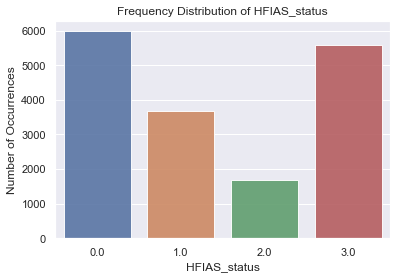

In [271]:
# note : consider using  plotly library for better visualisation

HFIAS_status_count = data_model['HFIAS_status'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x = HFIAS_status_count.index, y = HFIAS_status_count.values, alpha=0.9)
plt.title('Frequency Distribution of HFIAS_status')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('HFIAS_status', fontsize=12)
plt.show()

In [232]:
# encode ordinal data 
HFIAS_status = {'SeverelyFI':0,'ModeratelyFI':1,'MildlyFI':2,'FoodSecure':3 }           
data_model['HFIAS_status'] = data_model.HFIAS_status.apply(process_status)

data_model['HFIAS_status'].value_counts()

0.0    5983
3.0    5586
1.0    3676
2.0    1697
Name: HFIAS_status, dtype: int64

In [233]:
data_model['Country'].value_counts()

Ethiopia         3699
Burkina_Faso     3481
Tanzania         2880
Rwanda           2713
Kenya            2671
India            2455
Ghana            1943
Nigeria          1632
Vietnam          1534
Mali             1425
DRC              1376
Cambodia         1287
Zambia           1193
Uganda           1124
Burundi           834
Niger             721
Malawi            628
Sierra Leone      470
Cote d'Ivoire     422
LaoPDR            415
Guatemala         379
Ecuador           284
Comoros           283
Palestine         248
Morocco           221
Nicaragua         220
Costa_Rica        204
Peru              171
Senegal           165
Bolivia           134
South Africa      127
Honduras           60
El_Salvador        51
Name: Country, dtype: int64

In [250]:
# using one got encoding to encode categorical  data , country and  household type 
enc_data = pd.get_dummies(data_model, prefix = ['Nat','Type'],columns=['Country','HouseholdType'])


In [268]:
# pickle the data to be used 
enc_data.to_pickle('preprocessed_data.pkl')

# Imputation

#### Columns with missing Data and count 

In [258]:
missing_data = pd.DataFrame(data[data.columns[data.isnull().any()]].isnull().sum()/len(data)*100)

In [259]:
names = []
for i in range(len(missing_data)):
        names.append(missing_data.iloc[i].name)
values = []
for i in range(len(missing_data)):
        values.append(missing_data.iloc[i][0])

data_1 = {'Features': names,'Missing Data Percentage': values}

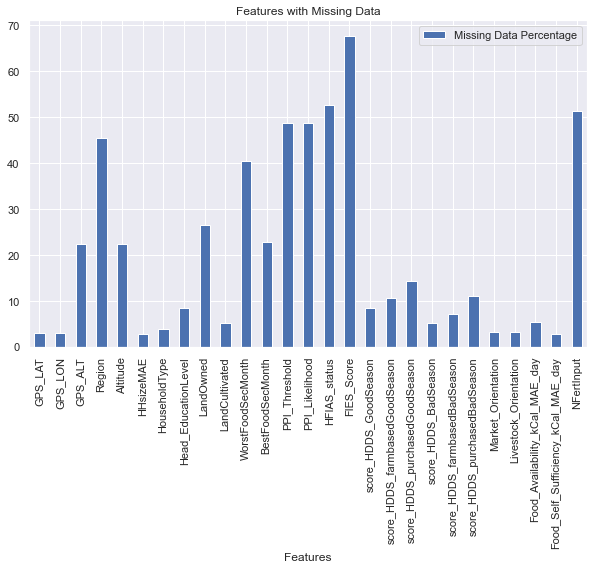

In [260]:
#plot bar chart  of missing data 

# Dictionary loaded into a DataFrame       

df = pd.DataFrame(data=data_1)

 

# Draw a vertical bar chart

df.plot.bar(x="Features", y="Missing Data Percentage", title="Features with Missing Data",figsize=(10,6))
plt.show(block=True)

#  Feature Selection